In [139]:
from numberplate_extractor.plate_extractor import PlateExtractor
from numberplate_extractor.processing_pipeline import ProcessingPipeline
from PIL import Image
import matplotlib.pyplot as plt
import os

In [140]:
plate_extractor = PlateExtractor()
processing_pipeline = ProcessingPipeline()

# Set entire run in one function
def extract_plate(image_path):
    image = Image.open(image_path)
    numberplate_prediction = plate_extractor.make_prediction(image)
    xmin, ymin, xmax, ymax = plate_extractor.get_bounding_box(numberplate_prediction)
    numberplate = processing_pipeline.crop_numberplate_from_original(image, xmin, ymin, xmax, ymax)
    processed_numberplate = processing_pipeline.apply_pipeline(numberplate)
    contours = processing_pipeline.find_sorted_contours(processed_numberplate)
    height, width = numberplate.shape[:2]
    numberplate_string = plate_extractor.extract_chars(width, height, contours, numberplate)
    return numberplate_string, image, numberplate

In [141]:
# Read example data directory
directory = 'example_data'
files = os.listdir(directory)
image_extensions = ('.png', '.jpg', '.jpeg', '.gif', '.bmp', '.tiff')
image_files = [os.path.join(directory, file) for file in files if file.lower().endswith(image_extensions)]
number_of_examples = len(image_files)

In [142]:
# Append output to array
outputs = []
for path in image_files:
    outputs.append((extract_plate(path)))


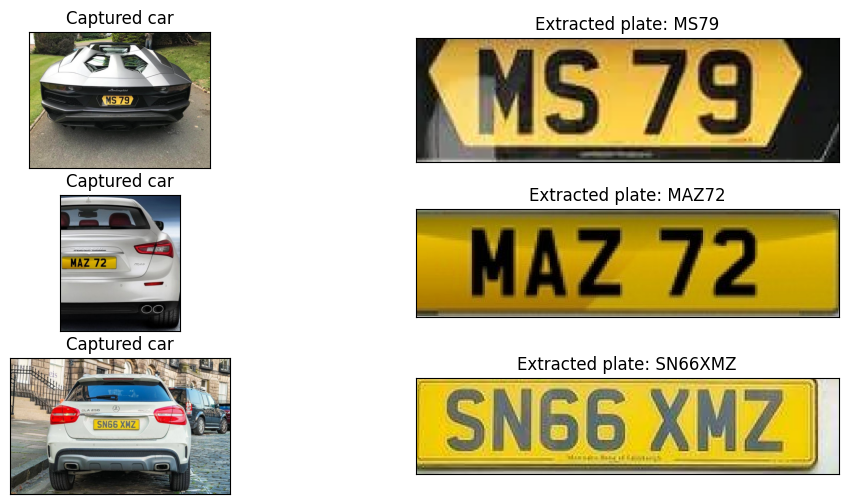

In [143]:
# Plot outputs and their extracted string

fig, axes = plt.subplots(number_of_examples, 2, figsize=(12, 6))
flat_axes = axes.flat

i = 0
current_example = 0
while (i < len(flat_axes)):
    flat_axes[i].imshow(outputs[current_example][1])
    flat_axes[i].set_title("Captured car")
    flat_axes[i].set_xticks([])
    flat_axes[i].set_yticks([])

    flat_axes[i+1].imshow(outputs[current_example][2])
    flat_axes[i+1].set_title(f"Extracted plate: {outputs[current_example][0]}")
    flat_axes[i+1].set_xticks([])
    flat_axes[i+1].set_yticks([])

    current_example += 1
    i+=2
    